In [1057]:
import sys
import os
import pcse
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [1058]:
data_dir = r'E:\23年调参\调参\44'

In [1059]:
from pcse.fileinput import CABOFileReader
soilfile = os.path.join(data_dir, '土壤44.soil')

In [1060]:
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider

In [1061]:
sitedata = WOFOST71SiteDataProvider(WAV=55, CO2=360)

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360}


In [1062]:
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, '管理44.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)

In [1063]:
from pcse.fileinput import ExcelWeatherDataProvider
weatherdataprovider = ExcelWeatherDataProvider(os.path.join(data_dir, "44.xlsx"))

In [1064]:
from pcse.base import ParameterProvider
from pcse.models import Wofost72_WLP_FD
cropfile = os.path.join(data_dir, '作物44.crop')
cropdata = CABOFileReader(cropfile)
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)

In [1065]:
import datetime 
dob = [datetime.date(2023,1,14),datetime.date(2023,2,6),datetime.date(2023,3,4),datetime.date(2023,3,28),datetime.date(2023,4,20)]
xob = [5.40,5.59,6.49,7.17,5.70]
tagp_true = [5015,7463,7672,11173,12103]
twso_true = [0,0,224,2321,6218]
nob = len(dob)

In [1066]:
wofsim = Wofost72_WLP_FD(parameters, weatherdataprovider, agromanagement)

In [1067]:
wofsim.run_till_terminate()
output = wofsim.get_output()
ds = [t["day"] for t in output]
xs =  [t["LAI"] for t in output]
dvs =  [t["DVS"] for t in output]
tagp =  [t["TAGP"] for t in output]
twso =  [t["TWSO"] for t in output]

In [1068]:
#输出模型数据表格
import pandas as pd

output_file_path = r'E:\23年调参\调参\44\wofost_results.xls'
if os.path.exists(output_file_path):
    os.remove(output_file_path)

df = pd.DataFrame(output)
df.to_excel(output_file_path, index=False)

D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  if __name__ == '__main__':


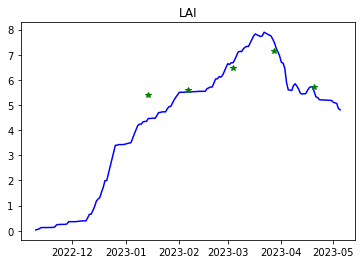

In [1069]:
plt.plot(ds, xs,'b')
plt.plot(dob, xob,'g*')
plt.title("LAI")
plt.show()

In [1070]:
f = open(r'LAI数据.txt',"r+")
f.truncate()
data = np.column_stack((ds, xs))  # 将x和y合并为一个数组
np.savetxt('LAI数据.txt', data ,fmt = '%s')
f.close()

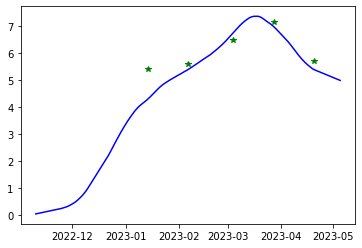

In [1071]:
import pandas as pd
from scipy.signal import savgol_filter as sg
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

# 读取数据文件
path = r'LAI数据.txt'
txttable = pd.read_csv(path, sep=' ', header=None, names=['Date', 'Value'])

# 提取日期和数值数据
dates = txttable['Date'].tolist()
values = txttable['Value'].tolist()

# 将日期数据转换为datetime对象
dates = [datetime.strptime(d, '%Y-%m-%d') for d in dates]

# 按照日期排序
dates, values = zip(*sorted(zip(dates, values)))

# SG滤波
res_sg = sg(x=values, window_length=31, polyorder=1)

# 绘制原始数据和滤波结果
fig, ax = plt.subplots(figsize=(6, 4))
# ax.plot(dates, values, 'g', label='Original Data')
ax.plot(dates, res_sg,'b')
ax.plot(dob, xob,'g*')
plt.show()

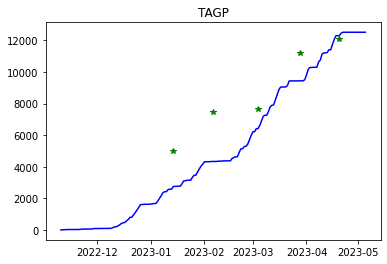

In [1072]:
plt.plot(dob, tagp_true,'g*')
plt.plot(ds, tagp,'b')
plt.title("TAGP")
plt.show()

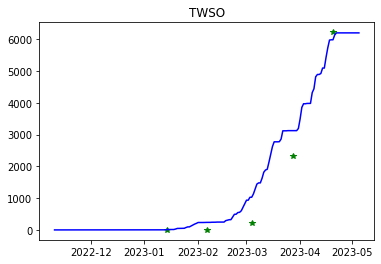

In [1073]:
plt.plot(dob, twso_true,'g*')
plt.plot(ds, twso,'b')
plt.title("TWSO")
plt.show()

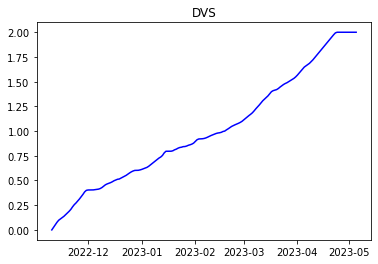

In [1076]:
dvs =  [t["DVS"] for t in output]
plt.plot(ds, dvs,'b')
plt.title("DVS")
plt.show()